<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#model" data-toc-modified-id="model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>model</a></span><ul class="toc-item"><li><span><a href="#functions" data-toc-modified-id="functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>functions</a></span></li><li><span><a href="#PCA-data-visualization" data-toc-modified-id="PCA-data-visualization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>PCA data visualization</a></span></li><li><span><a href="#transform-data-from-strings-to-numeric-data" data-toc-modified-id="transform-data-from-strings-to-numeric-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>transform data from strings to numeric data</a></span></li><li><span><a href="#prepare-data-for-model" data-toc-modified-id="prepare-data-for-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>prepare data for model</a></span></li></ul></li><li><span><a href="#nn-model1" data-toc-modified-id="nn-model1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>nn model1</a></span><ul class="toc-item"><li><span><a href="#nn_model-#2" data-toc-modified-id="nn_model-#2-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>nn_model #2</a></span></li><li><span><a href="#nn-model-3" data-toc-modified-id="nn-model-3-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>nn model 3</a></span></li></ul></li><li><span><a href="#nn-model-no-SMOTE,-use-weights" data-toc-modified-id="nn-model-no-SMOTE,-use-weights-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>nn model no SMOTE, use weights</a></span><ul class="toc-item"><li><span><a href="#model-and-assess-using-statistical-methods" data-toc-modified-id="model-and-assess-using-statistical-methods-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>model and assess using statistical methods</a></span></li></ul></li><li><span><a href="#use-best-performing-model-on-this-data" data-toc-modified-id="use-best-performing-model-on-this-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>use best performing model on this data</a></span></li><li><span><a href="#word2vec" data-toc-modified-id="word2vec-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>word2vec</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final Model</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [1]:
#import modules for Obtain/Scrub/Explore
import re
import pandas as pd 
import numpy as np 
import nltk
import string
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# model

In [75]:
# import modules for model
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import random
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,  LabelBinarizer
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras import models, layers, optimizers, initializers, callbacks, regularizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Input, Activation, BatchNormalization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import gensim

Using TensorFlow backend.


## functions

In [76]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

In [77]:
def model_results(x):
    results_train = x.evaluate(X_train, y_train)
    print('Training:', results_train)
    results_val = x.evaluate(X_val, y_val)
    print('Validation:', results_val)
    results_test = x.evaluate(X_test, y_test)
    print('Test:', results_test)
    

In [78]:
def acc_loss_plot(model_dict):
    acc_values = model_dict['accuracy']
    loss_values =model_dict['loss']

    epochs = range(1, len(loss_values) + 1)

    # Plot the training loss vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, loss_values, 'b', label='Training loss')

    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    # Plot the training accuracy vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, acc_values, 'r', label='Training acc')


    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.show()

In [79]:
# assess metrics of model
def get_metrics(y_test, yhat_classes,yhat_probs):
# accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
    precision = precision_score(y_test, yhat_classes)
    print('Precision: %f' % precision)
# recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat_classes)
    print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat_classes)
    print('F1 score: %f' % f1)
# ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)
# confusion matrix
    matrix = confusion_matrix(y_test, yhat_classes)
    print(matrix)

In [80]:
def plot_history(x):
    pd.DataFrame(x.history).plot(figsize=(10, 8))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

# import data

In [4]:
df = pd.read_csv('pn_df.csv')

## PCA data visualization

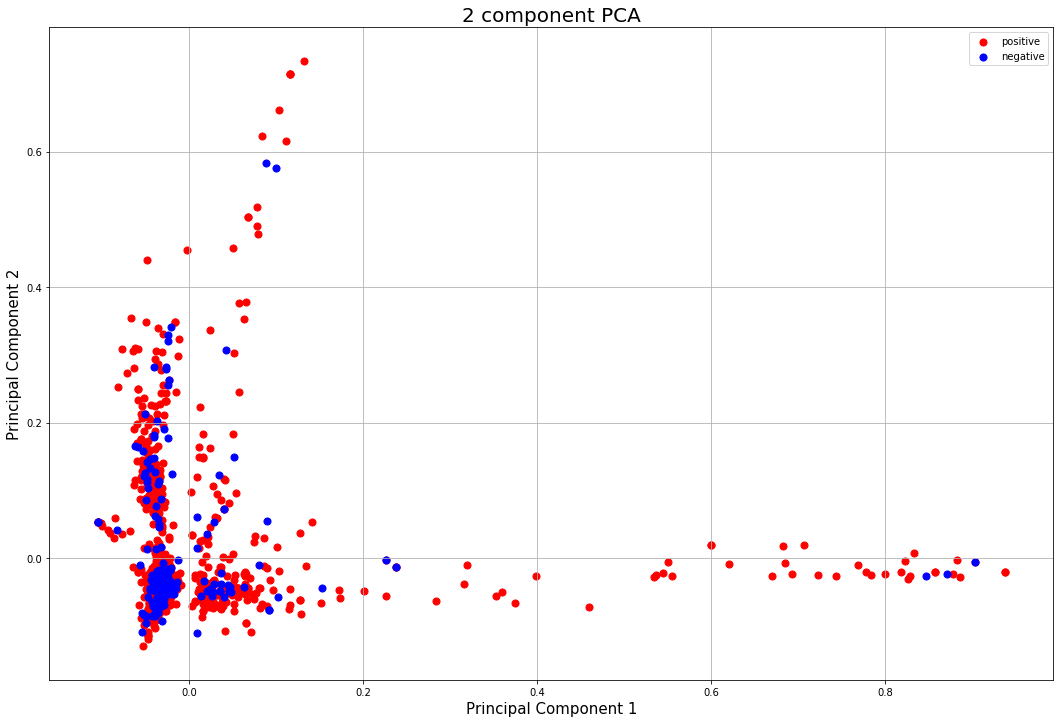

In [81]:
# plot PCA visualization of tokens

g_plot = df.copy()
col = ['wordl', 'sentiment']
g_plot = g_plot[col]
X_p = g_plot['wordl']
y_p = g_plot['sentiment']


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
Xp = pipeline.fit_transform(X_p).todense()

pca = PCA(n_components=2).fit(Xp)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xp)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, g_plot[['sentiment']]], axis = 1)

fig = plt.figure(figsize = (18,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['positive', 'negative']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['sentiment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## transform data from strings to numeric data

## prepare data for model 

In [82]:
# convert target data with labelencoder
le = LabelEncoder()
y = df['target'].copy()
le.fit_transform(y)

array([0, 1, 1, ..., 0, 1, 1])

In [83]:
X = df.wordl.copy()

In [84]:
#X = [" ".join(t) for t in df.tokenl]
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                     test_size=.2, stratify=y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train,
                                                    test_size=0.1, 
                                                    random_state=42,
                                                    stratify=y_train)


In [85]:
# verify shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Validation label shape:', np.shape(y_val))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))
print('Validation shape:', np.shape(X_val))

Test label shape: (679,)
Train label shape: (2441,)
Validation label shape: (272,)
Test shape: (679,)
Train shape: (2441,)
Validation shape: (272,)


In [86]:
pipeline = Pipeline([ ('vect', CountVectorizer(ngram_range=(1,2))), 
                     ('tfidf', TfidfTransformer(use_idf=True)), ])
X_train = pipeline.fit_transform(X_train).todense() 
X_test = pipeline.transform(X_test).todense() 
X_val = pipeline.transform(X_val).todense()


In [87]:
# verify shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Validation label shape:', np.shape(y_val))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))
print('Validation shape:', np.shape(X_val))

Test label shape: (679,)
Train label shape: (2441,)
Validation label shape: (272,)
Test shape: (679, 16802)
Train shape: (2441, 16802)
Validation shape: (272, 16802)


In [230]:
counter = Counter(y_train)
print(counter)

Counter({1: 2279, 0: 2279})


In [229]:
# apply smote to dataset due to imbalance of pos vs neg sentiment
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 2279, 0: 2279})


In [89]:
# verify new shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))

counter = Counter(y_train)
print(counter)

#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X_train)
count_terms = input_dimension[1]
print(count_terms)

Test label shape: (679,)
Train label shape: (4102,)
Test shape: (679, 16802)
Train shape: (4102, 16802)
16802


In [90]:
# parameters need to be defined, kernel initializers and regularizers applied. 
# assess layer structure, depth and width
# assess neurons 
# batch normalization
# dropout layers
# batch size and epochs
# activation function
# learning rate
# loss function & parameters

# nn model1 

In [91]:
# initializers with seed for reproducability
# for relu activated layer
initializer = keras.initializers.he_normal(seed=1)

# for tanh layer
initializer2 = keras.initializers.glorot_normal(seed=1)

# regularizer to minimize overfitting
regularizer = keras.regularizers.l2(0.01)

# early stopping callback to prevent overfitting
es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)

#define optimizer and learningrate/learning rate 
nad_opt = optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
ad_opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=10e-8)
sgd_opt = optimizers.SGD(lr=1e-6, momentum=0.9, nesterov=True)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [92]:
# create pyramid shaped sequential model

model1_2 = models.Sequential()

# activation layer 
model1_2.add(layers.Dense(500, input_dim=count_terms, activation='relu', 
                          kernel_regularizer=regularizer))
model1_2.add(layers.BatchNormalization(momentum=0.8))   
# add relu activated hidden layers
model1_2.add(layers.Dense(300, activation='relu'))   
# add relu activated hidden layers
model1_2.add(layers.Dense(100, activation='relu'))   
model1_2.add(layers.BatchNormalization(momentum=0.8))   
# add relu activated hidden layers
model1_2.add(layers.Dense(64,))   

model1_2.add(layers.Dense(6, ))  

# output layer with sigmoid activation for binary target
model1_2.add(layers.Dense(1, activation='sigmoid'))


nad_opt = optimizers.Nadam(lr=1e-5, beta_1=0.9, beta_2=0.999)
# use bce loss function for binary classification 
model1_2.compile(optimizer=nad_opt, loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [93]:
# Train the model 
predictions1_2 = model1_2.fit(X_train,
                    y_train,
                    epochs=300,
                    callbacks=[es_callback],
                    batch_size=72,
                    validation_data=(X_val, y_val),
                    shuffle=True
                    )
                    


Train on 4102 samples, validate on 272 samples
Epoch 1/300
4102/4102 [==============================] - 10s 3ms/step - loss: 10.2900 - accuracy: 0.5875 - val_loss: 10.0042 - val_accuracy: 0.6434
Epoch 2/300
4102/4102 [==============================] - 9s 2ms/step - loss: 9.4477 - accuracy: 0.8055 - val_loss: 9.4400 - val_accuracy: 0.7059
Epoch 3/300
4102/4102 [==============================] - 10s 2ms/step - loss: 8.8870 - accuracy: 0.9125 - val_loss: 9.0044 - val_accuracy: 0.7647
Epoch 4/300
4102/4102 [==============================] - 10s 2ms/step - loss: 8.4496 - accuracy: 0.9649 - val_loss: 8.6322 - val_accuracy: 0.7941
Epoch 5/300
4102/4102 [==============================] - 10s 2ms/step - loss: 8.0795 - accuracy: 0.9854 - val_loss: 8.3027 - val_accuracy: 0.8051
Epoch 6/300
4102/4102 [==============================] - 10s 2ms/step - loss: 7.7418 - accuracy: 0.9946 - val_loss: 7.9638 - val_accuracy: 0.8235
Epoch 7/300
4102/4102 [==============================] - 10s 2ms/step - los

Epoch 111/300
4102/4102 [==============================] - 10s 2ms/step - loss: 0.1442 - accuracy: 0.9980 - val_loss: 0.6620 - val_accuracy: 0.8824
Epoch 112/300
4102/4102 [==============================] - 10s 2ms/step - loss: 0.1383 - accuracy: 0.9978 - val_loss: 0.6734 - val_accuracy: 0.8750
Epoch 113/300
4102/4102 [==============================] - 10s 2ms/step - loss: 0.1337 - accuracy: 0.9971 - val_loss: 0.6783 - val_accuracy: 0.8824
Epoch 114/300
4102/4102 [==============================] - 10s 2ms/step - loss: 0.1293 - accuracy: 0.9980 - val_loss: 0.6900 - val_accuracy: 0.8787
Epoch 115/300
4102/4102 [==============================] - 9s 2ms/step - loss: 0.1245 - accuracy: 0.9983 - val_loss: 0.7687 - val_accuracy: 0.8824
Epoch 116/300
4102/4102 [==============================] - 10s 2ms/step - loss: 0.1202 - accuracy: 0.9980 - val_loss: 0.7132 - val_accuracy: 0.8897
Epoch 117/300
4102/4102 [==============================] - 9s 2ms/step - loss: 0.1165 - accuracy: 0.9978 - val_lo

4102/4102 [==============================] - 9s 2ms/step - loss: 0.0274 - accuracy: 0.9978 - val_loss: 0.7253 - val_accuracy: 0.8897
Epoch 222/300
4102/4102 [==============================] - 9s 2ms/step - loss: 0.0277 - accuracy: 0.9978 - val_loss: 0.7349 - val_accuracy: 0.8897
Epoch 223/300
4102/4102 [==============================] - 9s 2ms/step - loss: 0.0287 - accuracy: 0.9973 - val_loss: 0.8413 - val_accuracy: 0.8897
Epoch 224/300
4102/4102 [==============================] - 9s 2ms/step - loss: 0.0282 - accuracy: 0.9983 - val_loss: 0.8235 - val_accuracy: 0.8934
Epoch 225/300
4102/4102 [==============================] - 9s 2ms/step - loss: 0.0282 - accuracy: 0.9971 - val_loss: 0.9189 - val_accuracy: 0.8897
Epoch 226/300
4102/4102 [==============================] - 9s 2ms/step - loss: 0.0274 - accuracy: 0.9983 - val_loss: 0.7854 - val_accuracy: 0.8824
Epoch 227/300
4102/4102 [==============================] - 9s 2ms/step - loss: 0.0262 - accuracy: 0.9983 - val_loss: 0.8829 - val_ac

In [94]:
model1_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               8401500   
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

In [95]:
m1_dict2 =  predictions1_2.history
m1_dict2.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

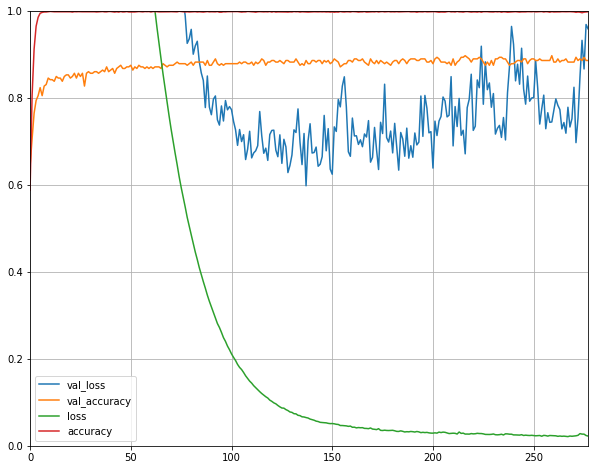

In [96]:
plot_history(predictions1_2)

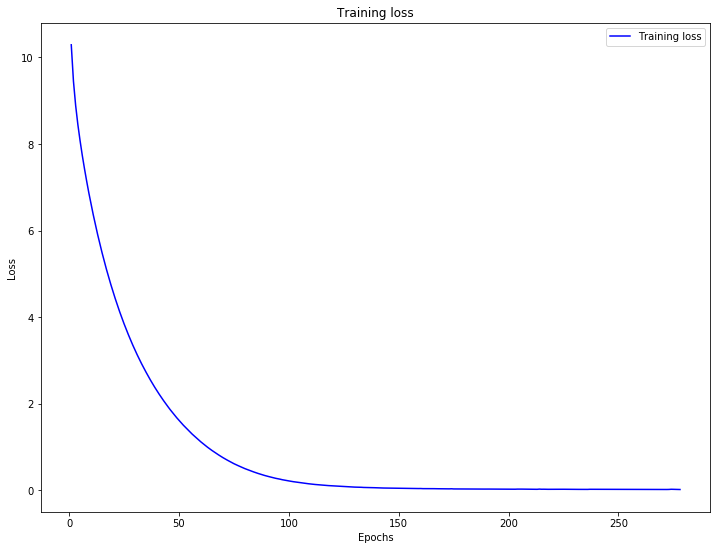

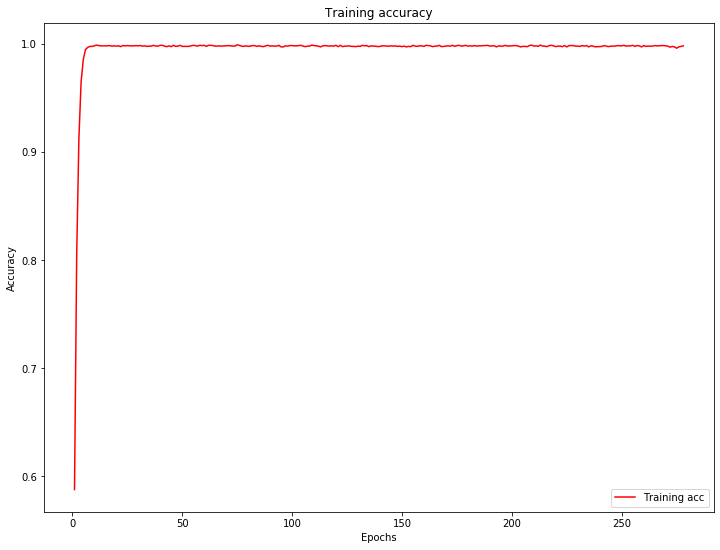

In [97]:
acc_loss_plot(m1_dict2)

In [98]:
model_results(model1_2)

4102/4102 [==============================] - 2s 580us/step
Training: [0.021052212561996086, 0.9985373020172119]
272/272 [==============================] - 0s 631us/step
Validation: [0.95884309796726, 0.8860294222831726]
679/679 [==============================] - 0s 679us/step
Test: [1.1476985609408505, 0.8748158812522888]


In [99]:
# predict probabilities for test set
yhat_probs = model1_2.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model1_2.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [100]:
# assess metrics of model
get_metrics(y_test, yhat_classes, yhat_probs)

Accuracy: 0.874816
Precision: 0.884311
Recall: 0.978947
F1 score: 0.929226
ROC AUC: 0.749348
[[ 36  73]
 [ 12 558]]


## nn_model #2 

In [101]:
regularizer2 = keras.regularizers.l2(0.01)

In [102]:
# create pyramid shaped sequential model
model2 = models.Sequential()
# activation layer 
model2.add(layers.Dense(300, input_dim=count_terms, activation='relu', 
                       kernel_initializer=initializer, kernel_regularizer=regularizer, ))
model2.add(layers.BatchNormalization(momentum=0.7))
# add relu activated hidden layers
model2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizer, 
                       ))   
# output layer with sigmoid activation for binary target
model2.add(layers.Dense(1, activation='sigmoid'))# create sequential model


In [103]:
# Compile the model
# early stopping to prevent overfitting changed to training loss rather than val_loss
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=10)

# optimizer
ad_opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# use bce loss function for binary classification 
model2.compile(optimizer=ad_opt, loss='binary_crossentropy', metrics=['accuracy'])

In [106]:
# Train the model 
predictions3 = model2.fit(X_train,
                    y_train,
                    epochs=300,
                    callbacks=[es_callback],
                    batch_size=100,
                    validation_data=(X_val, y_val),
                    shuffle=True
                    )

Train on 4102 samples, validate on 272 samples
Epoch 1/300
4102/4102 [==============================] - 4s 882us/step - loss: 0.1848 - accuracy: 0.9927 - val_loss: 0.4760 - val_accuracy: 0.8971
Epoch 2/300
4102/4102 [==============================] - 4s 864us/step - loss: 0.1743 - accuracy: 0.9927 - val_loss: 0.4496 - val_accuracy: 0.8971
Epoch 3/300
4102/4102 [==============================] - 4s 859us/step - loss: 0.1666 - accuracy: 0.9929 - val_loss: 0.4866 - val_accuracy: 0.8897
Epoch 4/300
4102/4102 [==============================] - 3s 851us/step - loss: 0.1453 - accuracy: 0.9956 - val_loss: 0.6110 - val_accuracy: 0.8824
Epoch 5/300
4102/4102 [==============================] - 4s 879us/step - loss: 0.2230 - accuracy: 0.9883 - val_loss: 0.7032 - val_accuracy: 0.8750
Epoch 6/300
4102/4102 [==============================] - 4s 876us/step - loss: 0.1726 - accuracy: 0.9929 - val_loss: 0.4907 - val_accuracy: 0.8897
Epoch 7/300
4102/4102 [==============================] - 4s 891us/step 

In [107]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 300)               5040900   
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                19264     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 5,061,429
Trainable params: 5,060,829
Non-trainable params: 600
_________________________________________________________________


In [108]:
model2_dict = predictions3.history
model2_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

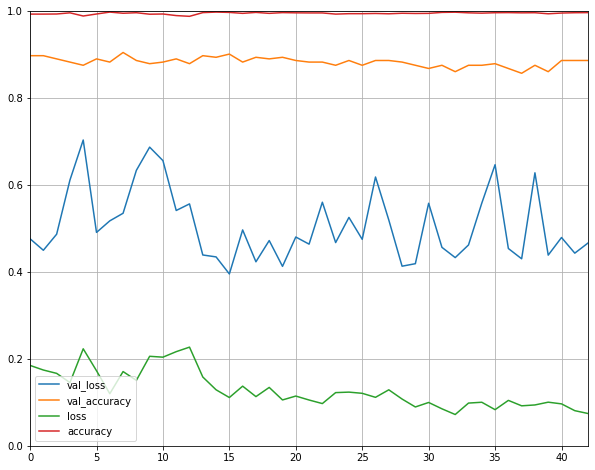

In [109]:
plot_history(predictions3)

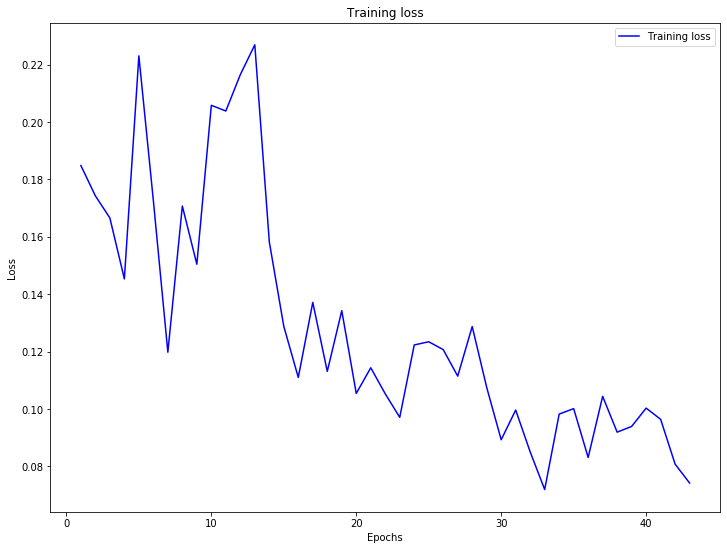

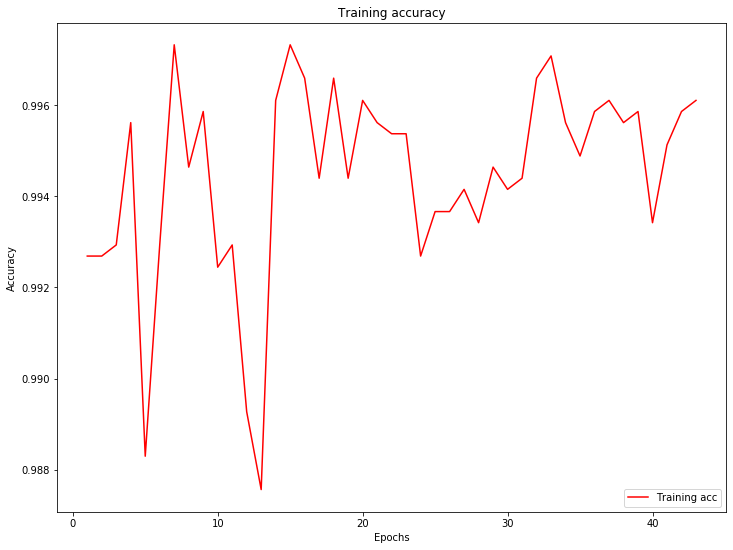

In [110]:
acc_loss_plot(model2_dict)

In [111]:
# Print the loss and accuracy for the training set 
model_results(model2)

4102/4102 [==============================] - 1s 329us/step
Training: [0.0702220226339687, 0.9968308210372925]
272/272 [==============================] - 0s 331us/step
Validation: [0.4663928484215456, 0.8860294222831726]
679/679 [==============================] - 0s 319us/step
Test: [0.5384353896128411, 0.8748158812522888]


In [112]:
# predict probabilities for test set
yhat_probs = model2.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model2.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]


In [113]:
# assess metrics for model
get_metrics(y_test, yhat_classes, yhat_probs)

Accuracy: 0.874816
Precision: 0.895595
Recall: 0.963158
F1 score: 0.928149
ROC AUC: 0.811492
[[ 45  64]
 [ 21 549]]


## nn model 3

In [114]:
# create sequential model
model3 = models.Sequential()

# activation layer 
model3.add(layers.Dense(312, input_dim=count_terms, activation='relu',
                        kernel_regularizer=regularizer2))
model3.add(layers.BatchNormalization(momentum=0.8))
model3.add(layers.Dense(96,  activation='relu',))
model3.add(layers.Dense(32,  activation='relu',))
model3.add(layers.BatchNormalization(momentum=0.8))
model3.add(layers.Dense(10,  activation='relu',))
# output layer with sigmoid activation for binary target
model3.add(layers.Dense(1, activation='sigmoid'))

In [115]:
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=10)
# optimizer
nad_opt = optimizers.Nadam(lr=1e-5, beta_1=0.9, beta_2=0.999)
# compile model
model3.compile(optimizer=nad_opt, loss="binary_crossentropy", metrics=['accuracy'])

In [116]:
# Train the model 
predictions4 = model3.fit(X_train,
                    y_train,
                    epochs=256,
                    callbacks=[es_callback],
                    batch_size=72,
                    validation_data=(X_val, y_val),
                    shuffle=True
                         )

Train on 4102 samples, validate on 272 samples
Epoch 1/256
4102/4102 [==============================] - 7s 2ms/step - loss: 6.6757 - accuracy: 0.5802 - val_loss: 6.6062 - val_accuracy: 0.4853
Epoch 2/256
4102/4102 [==============================] - 6s 1ms/step - loss: 6.2299 - accuracy: 0.7289 - val_loss: 6.2906 - val_accuracy: 0.5515
Epoch 3/256
4102/4102 [==============================] - 6s 1ms/step - loss: 5.8834 - accuracy: 0.8420 - val_loss: 6.0122 - val_accuracy: 0.6066
Epoch 4/256
4102/4102 [==============================] - 6s 1ms/step - loss: 5.5981 - accuracy: 0.9022 - val_loss: 5.7686 - val_accuracy: 0.6471
Epoch 5/256
4102/4102 [==============================] - 6s 1ms/step - loss: 5.3473 - accuracy: 0.9439 - val_loss: 5.5575 - val_accuracy: 0.6728
Epoch 6/256
4102/4102 [==============================] - 6s 1ms/step - loss: 5.1287 - accuracy: 0.9654 - val_loss: 5.3641 - val_accuracy: 0.6728
Epoch 7/256
4102/4102 [==============================] - 6s 1ms/step - loss: 4.9308

Epoch 57/256
4102/4102 [==============================] - 6s 1ms/step - loss: 1.0878 - accuracy: 0.9983 - val_loss: 1.3680 - val_accuracy: 0.8713
Epoch 58/256
4102/4102 [==============================] - 6s 1ms/step - loss: 1.0507 - accuracy: 0.9983 - val_loss: 1.3362 - val_accuracy: 0.8493
Epoch 59/256
4102/4102 [==============================] - 6s 1ms/step - loss: 1.0136 - accuracy: 0.9980 - val_loss: 1.2932 - val_accuracy: 0.8676
Epoch 60/256
4102/4102 [==============================] - 6s 1ms/step - loss: 0.9781 - accuracy: 0.9985 - val_loss: 1.2556 - val_accuracy: 0.8640
Epoch 61/256
4102/4102 [==============================] - 6s 1ms/step - loss: 0.9434 - accuracy: 0.9985 - val_loss: 1.2152 - val_accuracy: 0.8713
Epoch 62/256
4102/4102 [==============================] - 6s 1ms/step - loss: 0.9090 - accuracy: 0.9983 - val_loss: 1.1883 - val_accuracy: 0.8566
Epoch 63/256
4102/4102 [==============================] - 6s 1ms/step - loss: 0.8763 - accuracy: 0.9978 - val_loss: 1.1556 -

4102/4102 [==============================] - 6s 1ms/step - loss: 0.0894 - accuracy: 0.9980 - val_loss: 0.3583 - val_accuracy: 0.8750
Epoch 114/256
4102/4102 [==============================] - 6s 1ms/step - loss: 0.0854 - accuracy: 0.9980 - val_loss: 0.3731 - val_accuracy: 0.8860
Epoch 115/256
4102/4102 [==============================] - 6s 1ms/step - loss: 0.0817 - accuracy: 0.9985 - val_loss: 0.3620 - val_accuracy: 0.8824
Epoch 116/256
4102/4102 [==============================] - 6s 1ms/step - loss: 0.0775 - accuracy: 0.9983 - val_loss: 0.3559 - val_accuracy: 0.8824
Epoch 117/256
4102/4102 [==============================] - 6s 1ms/step - loss: 0.0743 - accuracy: 0.9985 - val_loss: 0.3420 - val_accuracy: 0.8750
Epoch 118/256
4102/4102 [==============================] - 6s 1ms/step - loss: 0.0709 - accuracy: 0.9983 - val_loss: 0.3458 - val_accuracy: 0.8824
Epoch 119/256
4102/4102 [==============================] - 6s 2ms/step - loss: 0.0682 - accuracy: 0.9983 - val_loss: 0.3689 - val_ac

Epoch 169/256
4102/4102 [==============================] - 5s 1ms/step - loss: 0.0192 - accuracy: 0.9978 - val_loss: 0.4365 - val_accuracy: 0.8934
Epoch 170/256
4102/4102 [==============================] - 6s 1ms/step - loss: 0.0189 - accuracy: 0.9983 - val_loss: 0.4331 - val_accuracy: 0.8897
Epoch 171/256
4102/4102 [==============================] - 6s 1ms/step - loss: 0.0194 - accuracy: 0.9978 - val_loss: 0.4399 - val_accuracy: 0.8934
Epoch 172/256
4102/4102 [==============================] - 5s 1ms/step - loss: 0.0189 - accuracy: 0.9983 - val_loss: 0.4403 - val_accuracy: 0.8934
Epoch 173/256
4102/4102 [==============================] - 5s 1ms/step - loss: 0.0189 - accuracy: 0.9980 - val_loss: 0.4768 - val_accuracy: 0.8971
Epoch 174/256
4102/4102 [==============================] - 5s 1ms/step - loss: 0.0188 - accuracy: 0.9985 - val_loss: 0.4544 - val_accuracy: 0.8934
Epoch 175/256
4102/4102 [==============================] - 5s 1ms/step - loss: 0.0183 - accuracy: 0.9980 - val_loss: 0

In [117]:
model3_dict = predictions4.history
model3_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [118]:
model_results(model3)

4102/4102 [==============================] - 1s 349us/step
Training: [0.01447627221804924, 0.9985373020172119]
272/272 [==============================] - 0s 347us/step
Validation: [0.564407096189611, 0.8933823704719543]
679/679 [==============================] - 0s 345us/step
Test: [0.6186439559105043, 0.876288652420044]


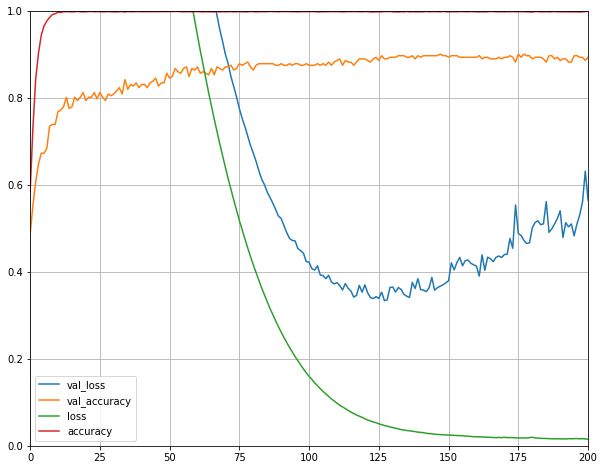

In [119]:
plot_history(predictions4)

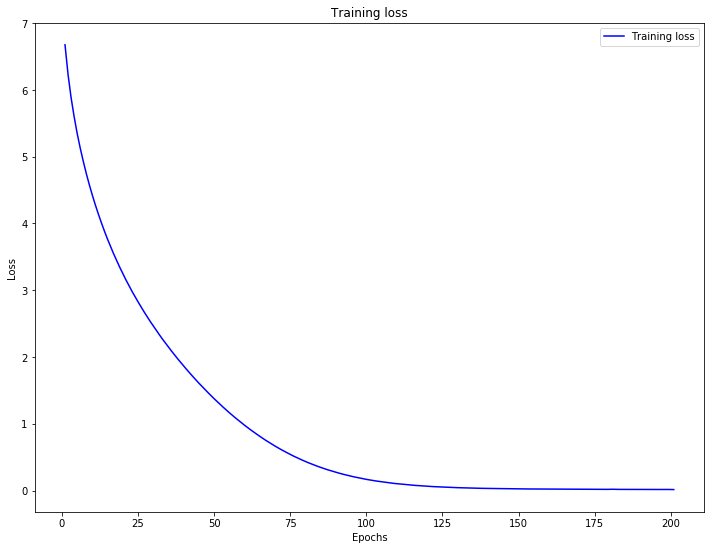

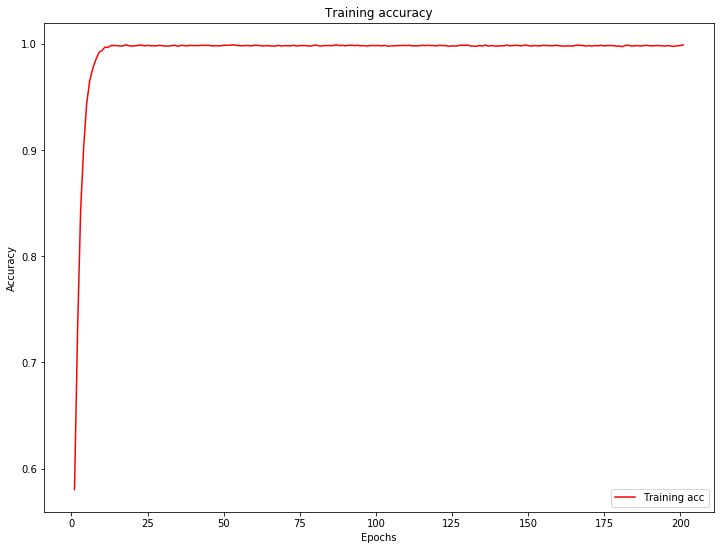

In [120]:
acc_loss_plot(model3_dict)

In [121]:
# Output (probability) predictions for the train set 
y_hat_train = model3.predict(X_train) 


In [122]:
# predict probabilities for test set
yhat_probs = model3.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model3.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [123]:
get_metrics(y_test, yhat_classes,yhat_probs)

Accuracy: 0.876289
Precision: 0.893204
Recall: 0.968421
F1 score: 0.929293
ROC AUC: 0.797819
[[ 43  66]
 [ 18 552]]


# nn model no SMOTE, use weights

In [124]:
# prepare data
X = df.wordl.copy()

y1 = df['target'].astype('category')
# split data 
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y1, random_state=42,
                                                     test_size=.2, stratify=y1)

# split data 
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, random_state=42,
                                                     test_size=.1, stratify=y3_train)
# build TFIDF features on tweet with tfidf vectorizer
tfv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2), use_idf=True
                     )
X_train_trans = tfv.fit_transform(X3_train)
xdf = pd.DataFrame(X_train_trans[0].T.todense(),
index=tfv.get_feature_names(), columns=["term"])
xdf = xdf.sort_values('term', ascending=False)
print (xdf.head(25))
X_val_trans = tfv.transform(X3_val)
test_features = tfv.transform(X3_test)
X3_train = X_train_trans
X3_test = test_features
X3_val = X_val_trans

                       term
heard not          0.270758
cool technology    0.268724
technology one     0.268724
go conference      0.266773
not go             0.264898
ever heard         0.264898
one ever           0.264898
come cool          0.264898
conference         0.253504
technology         0.244309
heard              0.241977
ever               0.236602
cool               0.211181
come               0.211181
go                 0.207724
one                0.192605
not                0.149960
policy             0.000000
police user        0.000000
police             0.000000
pointer hilarious  0.000000
possibly           0.000000
pointer            0.000000
point towards      0.000000
point totally      0.000000


In [125]:
# verify shape of data
print('Test label shape:', np.shape(y3_test))
print('Validation label shape:', np.shape(y3_val))
print('Train label shape:', np.shape(y3_train))
print('Test shape:', np.shape(X3_test))
print('Validation shape:', np.shape(X3_val))
print('Train shape:', np.shape(X3_train))
#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X3_train)
count_terms = input_dimension[1]


Test label shape: (679,)
Validation label shape: (272,)
Train label shape: (2441,)
Test shape: (679, 16802)
Validation shape: (272, 16802)
Train shape: (2441, 16802)


In [126]:
# get class weights for use in model in lieu of smote
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y3_train), y3_train)
print(class_weights)

[3.12948718 0.59507557]


In [127]:
# create model
model4 = models.Sequential()
# activation layer 
model4.add(layers.Dense(300, input_dim=count_terms, activation='relu', 
                       kernel_initializer=initializer, kernel_regularizer=regularizer, ))
model4.add(layers.BatchNormalization(momentum=0.7))
# add relu activated hidden layers
model4.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizer, 
                       ))   
# output layer with sigmoid activation for binary target
model4.add(layers.Dense(1, activation='sigmoid'))

In [128]:
# early stopping callback to prevent overfitting
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta= 0.001, patience=7)
# use bce loss function for binary classification and default adagrad optimizerparameters
model4.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])

In [129]:
# Train the model 
predictions5 = model4.fit(X3_train,
                    y3_train,
                    epochs=200,
                    callbacks=[es_callback],
                    batch_size=72,
                    class_weight={1:3.1, 0:0.60},
                    validation_data=(X3_val, y3_val),
                    shuffle=True                    
                    )                 

Train on 2441 samples, validate on 272 samples
Epoch 1/200
2441/2441 [==============================] - 3s 1ms/step - loss: 1.8197 - accuracy: 0.8316 - val_loss: 1.0338 - val_accuracy: 0.8603
Epoch 2/200
2441/2441 [==============================] - 2s 866us/step - loss: 0.5700 - accuracy: 0.9652 - val_loss: 0.6686 - val_accuracy: 0.8860
Epoch 3/200
2441/2441 [==============================] - 2s 893us/step - loss: 0.3883 - accuracy: 0.9779 - val_loss: 0.6627 - val_accuracy: 0.8897
Epoch 4/200
2441/2441 [==============================] - 2s 880us/step - loss: 0.3179 - accuracy: 0.9771 - val_loss: 0.5816 - val_accuracy: 0.8934
Epoch 5/200
2441/2441 [==============================] - 2s 896us/step - loss: 0.2482 - accuracy: 0.9861 - val_loss: 0.5819 - val_accuracy: 0.8824
Epoch 6/200
2441/2441 [==============================] - 2s 873us/step - loss: 0.2362 - accuracy: 0.9853 - val_loss: 0.5461 - val_accuracy: 0.8787
Epoch 7/200
2441/2441 [==============================] - 2s 874us/step - 

In [130]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 300)               5040900   
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)               1200      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                19264     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 5,061,429
Trainable params: 5,060,829
Non-trainable params: 600
_________________________________________________________________


In [131]:
model4_dict = predictions5.history
model4_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

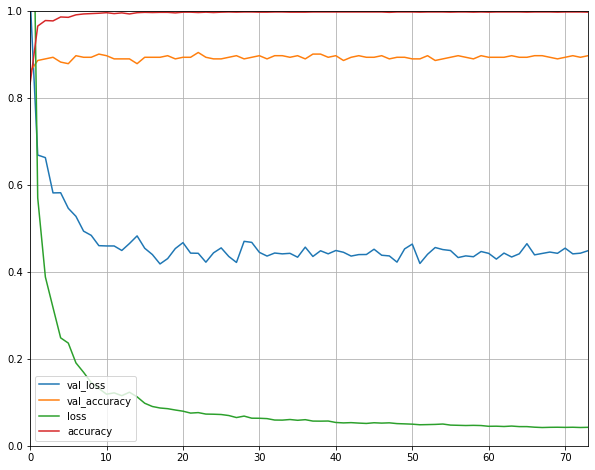

In [132]:
plot_history(predictions5)

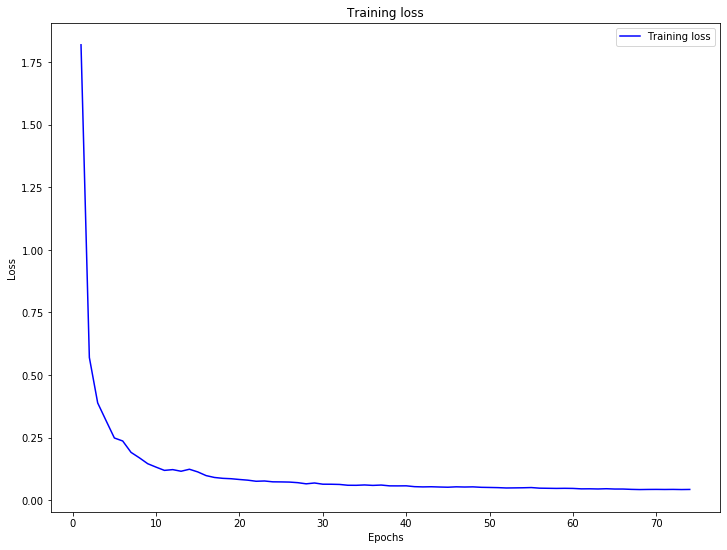

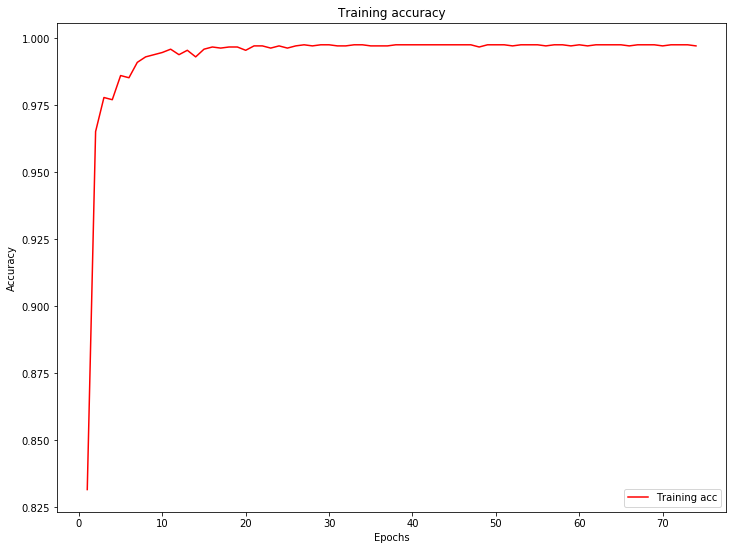

In [133]:
acc_loss_plot(model4_dict)

In [134]:
# Print the loss and accuracy for the training set 
results_train = model4.evaluate(X3_train, y3_train)
results_train

2441/2441 [==============================] - 1s 275us/step


[0.04008860966371543, 0.9975419640541077]

In [135]:
results_val = model4.evaluate(X3_val, y3_val)
results_val

272/272 [==============================] - 0s 293us/step


[0.4486280819948982, 0.8970588445663452]

In [136]:
# Output (probability) predictions for the train set 
y_hat_train = model4.predict(X3_train) 

In [137]:
# Print the loss and accuracy for the test set 
results_test = model4.evaluate(X3_test, y3_test)
results_test

679/679 [==============================] - 0s 279us/step


[0.5436760455764973, 0.8792341947555542]

In [138]:
# predict probabilities for test set
yhat_probs = model4.predict(X3_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model4.predict_classes(X3_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [139]:
get_metrics(y3_test, yhat_classes,yhat_probs)

Accuracy: 0.879234
Precision: 0.888535
Recall: 0.978947
F1 score: 0.931553
ROC AUC: 0.840254
[[ 39  70]
 [ 12 558]]


## model and assess using statistical methods

# use best performing model on this data 

In [140]:
p6 = model1_2.fit(X3_train,
                    y3_train,
                    epochs=500,
                    callbacks=[es_callback],
                    batch_size=100,
                    class_weight={1:3.1, 0:0.60},
                    validation_data=(X3_val, y3_val),
                    shuffle=True
                         )


Train on 2441 samples, validate on 272 samples
Epoch 1/500
2441/2441 [==============================] - 4s 2ms/step - loss: 0.8939 - accuracy: 0.9045 - val_loss: 0.9102 - val_accuracy: 0.8088
Epoch 2/500
2441/2441 [==============================] - 4s 2ms/step - loss: 0.6008 - accuracy: 0.9340 - val_loss: 0.5779 - val_accuracy: 0.8897
Epoch 3/500
2441/2441 [==============================] - 4s 2ms/step - loss: 0.2058 - accuracy: 0.9807 - val_loss: 0.5479 - val_accuracy: 0.8824
Epoch 4/500
2441/2441 [==============================] - 4s 2ms/step - loss: 0.0941 - accuracy: 0.9951 - val_loss: 0.5235 - val_accuracy: 0.8860
Epoch 5/500
2441/2441 [==============================] - 4s 2ms/step - loss: 0.0802 - accuracy: 0.9971 - val_loss: 0.6287 - val_accuracy: 0.8750
Epoch 6/500
2441/2441 [==============================] - 4s 2ms/step - loss: 0.0625 - accuracy: 0.9975 - val_loss: 0.5435 - val_accuracy: 0.8897
Epoch 7/500
2441/2441 [==============================] - 4s 2ms/step - loss: 0.0562

In [141]:
# predict probabilities for test set
yhat_probs = model1_2.predict(X3_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model1_2.predict_classes(X3_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
get_metrics(y3_test, yhat_classes,yhat_probs)

Accuracy: 0.879234
Precision: 0.894822
Recall: 0.970175
F1 score: 0.930976
ROC AUC: 0.762651
[[ 44  65]
 [ 17 553]]


In [142]:
# summarize the  class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 2051, 0: 2051})


In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB, BernoulliNB, MultinomialNB

In [223]:
# the models that you want to compare
stat_models = {
    'clf_randforest' : RandomForestClassifier(),
    'clf_knn' : KNeighborsClassifier(),
}
# the optimisation parameters for each of the above models
params = {
    'clf_randforest': {
        'n_jobs': [-1],
        'criterion': ['gini', 'entropy']
    },
    'clf_knn': {
        'n_neighbors':[6],
        'weights': ['distance'],
        'algorithm': ['ball_tree']
         },
 
                     }

In [224]:
def fit_search(X_data, y_data):
        """
        fits the list of models to the training data, thereby obtaining in each 
        case an evaluation score after GridSearchCV cross-validation
        """
        for name in stat_models.keys():
            est = stat_models[name]
            est_params = params[name]
            gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=10)
            gscv.fit(X_data, y_data)
            print("best parameters are: {}".format(gscv.best_estimator_))
            y_pred = gscv.predict(X_data)
            print(classification_report(y_data, y_pred))
          

In [225]:
# assess class distribution for prior / weights
counter = Counter(y3_train)
print(counter)
print(len(y3_train))
prob1= 2279/3392
prob0=434/3392
print (prob1)
print (prob0)

Counter({1: 2051, 0: 390})
2441
0.671875
0.12794811320754718


In [226]:
# grid search on unaltered data/unbalanced
fit_search(X3_train, y3_train)
warnings.filterwarnings('ignore') 

best parameters are: RandomForestClassifier(n_jobs=-1)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       390
           1       1.00      1.00      1.00      2051

    accuracy                           1.00      2441
   macro avg       1.00      0.99      0.99      2441
weighted avg       1.00      1.00      1.00      2441

best parameters are: KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, weights='distance')
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       390
           1       1.00      1.00      1.00      2051

    accuracy                           1.00      2441
   macro avg       0.99      1.00      1.00      2441
weighted avg       1.00      1.00      1.00      2441



In [227]:
print('Test label shape:', np.shape(y3_test))
print('Train label shape:', np.shape(y3_train))
print('Test shape:', np.shape(X3_test))
print('Train shape:', np.shape(X3_train))

Test label shape: (679,)
Train label shape: (2441,)
Test shape: (679, 16802)
Train shape: (2441, 16802)


In [149]:
from sklearn.model_selection import cross_val_score, KFold
# x=X_train_scaled, y = y_train_scaled, z = y_test_scaled
def cv_score(model, x_train, y_train, y_test, y_pred):
    #CV scores, 10 fold CV
    scores = cross_val_score(model, x_train, y_train, cv=10)
    #Prediction and accuracy
    accuracy_test = accuracy_score(y_test, y_pred)
    #Print the summary
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print ("Test Accuracy: %0.2f" % (accuracy_test))

In [150]:
#visualize confusion matrix
def vis_cm(model, X, y, y_pred):
    score = model.score(X, y)
    confusion = confusion_matrix(y, y_pred)
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    confusion.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
    matrix_title = "Test Accuracy: %0.2f for {model}" % (score)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [151]:
# Instantiate multinomial bayes
mnb = MultinomialNB(alpha=1.0, fit_prior=True)

# Fit the model to training data
mnb_model = mnb.fit(X3_train, y3_train)

# Predict on test set
y_pred_mnb = mnb_model.predict(X3_test)
print(mnb_model.score(X3_train, y3_train))
print(mnb_model.score(X3_test, y3_test))
print(classification_report(y_test, y_pred_mnb))

0.869315854158132
0.845360824742268
              precision    recall  f1-score   support

           0       0.83      0.05      0.09       109
           1       0.85      1.00      0.92       570

    accuracy                           0.85       679
   macro avg       0.84      0.52      0.50       679
weighted avg       0.84      0.85      0.78       679



In [152]:
#did not perform well on negative sentiment data(also smaller class)

In [153]:
# get accuracy scores for training data vs test data
cv_score(mnb_model, X3_train, y3_train, y3_test, y_pred_mnb)

Accuracy: 0.85 (+/- 0.01)
Test Accuracy: 0.85


In [154]:
confusion_matrix(y3_test, y_pred_mnb)

array([[  5, 104],
       [  1, 569]])

Train AUC: 0.9738589055995199
Test AUC: 0.7656365684854338


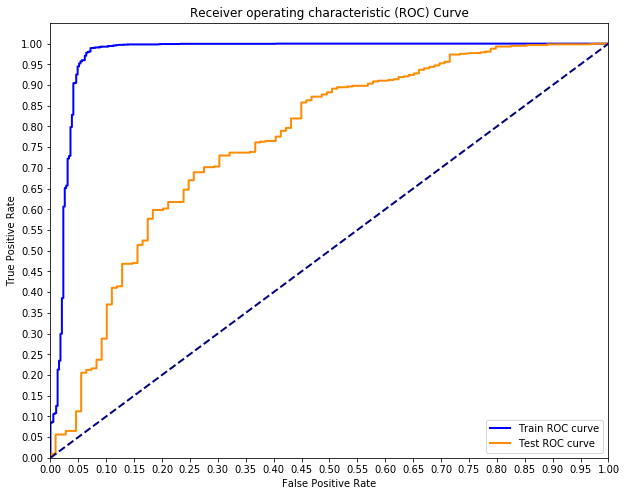

In [155]:

#plot roc/auc
test_probs = mnb_model.predict_proba(X3_test)
preds  = test_probs[:,1]
train_probs = mnb_model.predict_proba(X3_train)
y_train_score  = train_probs[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, preds)

dt_fpr, dt_tpr, dt_th = roc_curve(y3_test, preds)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [156]:
# Instantiate bernoulli naive bayes on og data
bnb = BernoulliNB(alpha=1.0, fit_prior=True)

# Fit the model to training data
bnb_model = bnb.fit(X3_train, y3_train)

# Predict on test set
y_pred_bnb = bnb_model.predict(X3_test)
print(bnb_model.score(X3_train, y3_train))
print(bnb_model.score(X3_test, y3_test))
print(classification_report(y_test, y_pred_bnb))

0.8811962310528472
0.845360824742268
              precision    recall  f1-score   support

           0       0.83      0.05      0.09       109
           1       0.85      1.00      0.92       570

    accuracy                           0.85       679
   macro avg       0.84      0.52      0.50       679
weighted avg       0.84      0.85      0.78       679



In [157]:
# cv scores
cv_score(bnb_model, X3_train, y3_train, y3_test, y_pred_bnb)

Accuracy: 0.84 (+/- 0.01)
Test Accuracy: 0.85


In [158]:
confusion_matrix(y3_test, y_pred_bnb)

array([[  5, 104],
       [  1, 569]])

Train AUC: 0.9608502419082623
Test AUC: 0.684588765491711


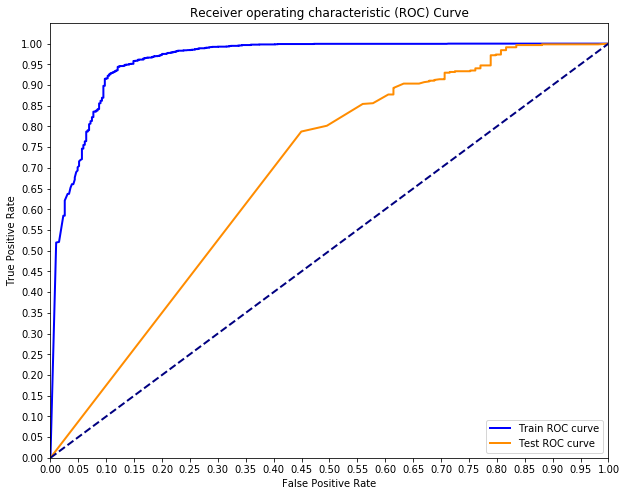

In [159]:
test_probs = bnb_model.predict_proba(X3_test)
preds  = test_probs[:,1]
train_probs = bnb_model.predict_proba(X3_train)
y_train_score  = train_probs[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, preds)

dt_fpr, dt_tpr, dt_th = roc_curve(y3_test, preds)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [160]:
#neither of the bayes classifiers performed well on the negative sentiment data

In [161]:
# Instantiate random forest on balanced smote data
rf = RandomForestClassifier(n_jobs=-1)

# Fit the model to training data
rf_model = rf.fit(X3_train, y3_train)

# Predict on test set
y_pred_rf = rf_model.predict(X3_test)
print(rf_model.score(X3_train, y3_train))
print(rf_model.score(X3_test, y3_test))
print(classification_report(y3_test, y_pred_rf))

0.9975419909873003
0.8703976435935199
              precision    recall  f1-score   support

           0       0.89      0.22      0.35       109
           1       0.87      0.99      0.93       570

    accuracy                           0.87       679
   macro avg       0.88      0.61      0.64       679
weighted avg       0.87      0.87      0.84       679



In [162]:
 #cv scores
cv_score(rf_model, X3_train, y3_train, y3_test, y_pred_rf)

Accuracy: 0.87 (+/- 0.02)
Test Accuracy: 0.87


In [163]:
confusion_matrix(y_test, y_pred_rf)

array([[ 24,  85],
       [  3, 567]])

Train AUC: 0.9999024865919064
Test AUC: 0.8038065346853371


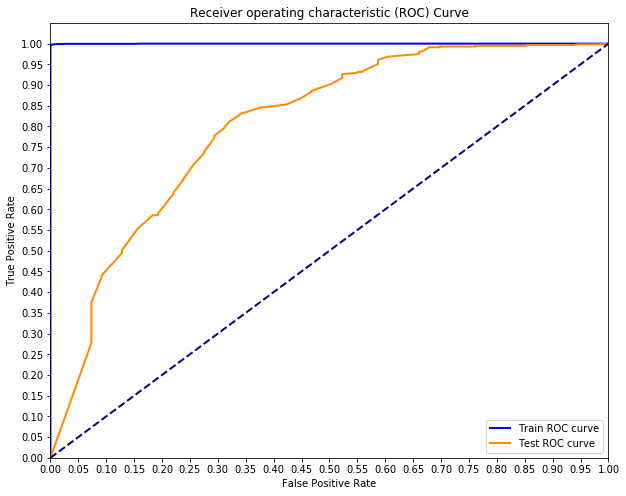

In [164]:
test_probs = rf_model.predict_proba(X3_test)
preds  = test_probs[:,1]
train_probs = rf_model.predict_proba(X3_train)
y_train_score  = train_probs[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, preds)

dt_fpr, dt_tpr, dt_th = roc_curve(y3_test, preds)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [165]:
# did not perform well on negative data either

In [166]:
knn_clf = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
# Fit the model to training data
knn_model = knn_clf.fit(X3_train, y3_train)
# Predict on test set
y_pred_knn = knn_model.predict(X3_test)
print(knn_model.score(X3_train, y3_train))
print(knn_model.score(X3_test, y3_test))
print(classification_report(y3_test, y_pred_knn))
# confusion matrix
confusion_matrix(y3_test, y_pred_knn)

0.9975419909873003
0.8600883652430045
              precision    recall  f1-score   support

           0       0.64      0.29      0.40       109
           1       0.88      0.97      0.92       570

    accuracy                           0.86       679
   macro avg       0.76      0.63      0.66       679
weighted avg       0.84      0.86      0.84       679



array([[ 32,  77],
       [ 18, 552]])

In [167]:
# cv scores
cv_score(knn_model, X3_train, y3_train, y3_test, y_pred_knn)

Accuracy: 0.87 (+/- 0.03)
Test Accuracy: 0.86


Train AUC: 0.9999774969058246
Test AUC: 0.7070416867857718


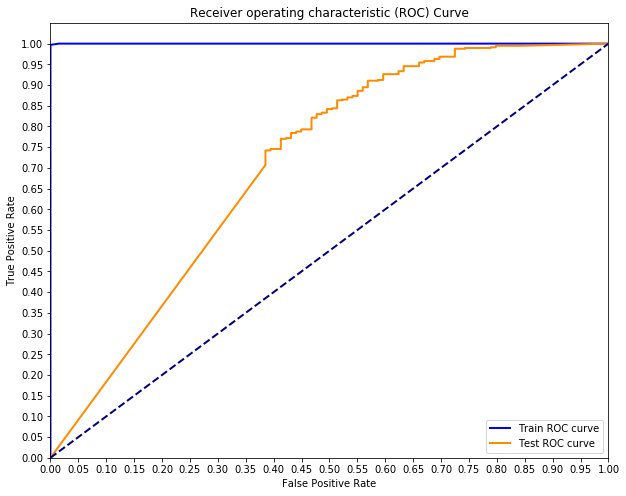

In [168]:
test_probs = knn_model.predict_proba(X3_test)
preds  = test_probs[:,1]
train_probs = knn_model.predict_proba(X3_train)
y_train_score  = train_probs[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, preds)

dt_fpr, dt_tpr, dt_th = roc_curve(y3_test, preds)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


none of the statistical methods performed well on data, due to lack of data. this was tried on smote dataset as well, with similar results

# word2vec

In [169]:
from tqdm import tqdm

In [170]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [171]:
from gensim.models import Word2Vec 
import time

start_time = time.time()

In [172]:
lb = LabelBinarizer()
y = pd.DataFrame()
y = lb.fit_transform(df['target'])

In [173]:
X= df['wordl'].copy()

In [174]:
train_corpus = df['wordl'].copy()
size=100
## create list of lists of unigrams
corpus = []
for string in train_corpus:
   words = string.split()
   grams = [" ".join(words[i:i+1]) 
               for i in range(0, len(words), 1)]
   corpus.append(grams)

## detect bigrams 
bigrams_detector = gensim.models.phrases.Phrases(corpus, 
                delimiter=" ".encode(), min_count=5, threshold=7)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)


In [175]:
wv_nlp_model_file = 'nlp_' + 'word2vec_' + str(size) + '.model'
wv_nlp_model = Word2Vec(corpus,  min_count=3,
                     window=5,
                     size=100,
                     sg=1,
                     alpha=0.01, 
                     min_alpha=0.0007, 
                     workers=5)
print("Time taken to train word2vec nlp model: " + str(time.time() - start_time))
wv_nlp_model.save(wv_nlp_model_file)

Time taken to train word2vec nlp model: 0.7432560920715332


In [176]:

## tokenize text
tokenizer = Tokenizer(split=' ', 
                      )
tokenizer.fit_on_texts(corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
text2seq= tokenizer.texts_to_sequences(corpus)
## padding sequence
X = pad_sequences(text2seq, 
                    maxlen=maxlen+1, padding="post", truncating="post")

In [177]:
vocab_size = (len(dic_vocabulary)+1)
vocab_size

5059

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     df['target'], 
                                                     random_state=42,
                                                     test_size=.2, stratify=y)

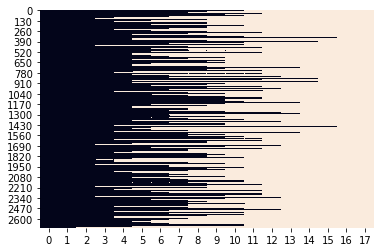

In [179]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [180]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, size))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  wv_nlp_model[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

In [181]:
i = 0

## list of text: ["I like this", ...]
len_txt = len(df["wordl"].iloc[i].split())
print("from: ", df["wordl"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", df["wordl"].iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[df["wordl"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  hr tweeting rise dead need upgrade plugin station | len: 8
to:  [ 137   52  170   20  198  253   42   39   12  114   15 2438    0    0
    0    0    0    0] | len: 18
check:  hr  -- idx in vocabulary --> 1028
vocabulary:  {'store': 1, 'app': 2, 'not': 3, 'new': 4, 'pop': 5} ... (padding element, 0)


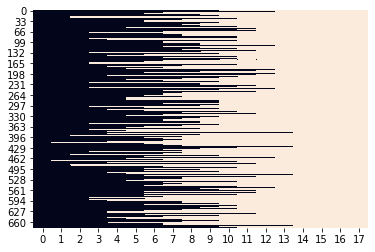

In [182]:
# plot heatmap for test data
sns.heatmap(X_test==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [183]:
word = "app"
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, 
      "|vector")
print(embeddings.shape)
print(len(dic_vocabulary))

dic[word]: 2 |idx
embeddings[idx]: (100,) |vector
(5059, 100)
5058


In [184]:
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))

Test label shape: (679,)
Train label shape: (2713,)
Test shape: (679, 18)
Train shape: (2713, 18)


In [185]:
regularizerA = keras.regularizers.l2(0.01)
regularizerB = keras.regularizers.l2(0.001)

In [215]:

modelw = models.Sequential()

## embedding
modelw.add(layers.Embedding(vocab_size, 400, input_length=maxlen+1, ))
                       
modelw.add(layers.BatchNormalization(momentum=0.8))
     
modelw.add(layers.Dense(200, activation='relu', ))  
#modelw.add(layers.BatchNormalization(momentum=0.6))
modelw.add(layers.Dense(44, activation='relu',  )) 
modelw.add(layers.GlobalAveragePooling1D()),
modelw.add(layers.Dense(1, activation='sigmoid'))
a_opt = optimizers.Adam(lr=1e-5,)

## compile
modelw.compile(loss='binary_crossentropy',
              optimizer=a_opt, metrics=['accuracy'])

modelw.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 18, 400)           2023600   
_________________________________________________________________
batch_normalization_10 (Batc (None, 18, 400)           1600      
_________________________________________________________________
dense_27 (Dense)             (None, 18, 200)           80200     
_________________________________________________________________
dense_28 (Dense)             (None, 18, 44)            8844      
_________________________________________________________________
global_average_pooling1d_3 ( (None, 44)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 45        
Total params: 2,114,289
Trainable params: 2,113,489
Non-trainable params: 800
__________________________________________

In [216]:
# early stopping to prevent overfitting
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta= 0.001, patience=13)
#es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
#fit model
training = modelw.fit(X_train, y_train, 
                     epochs=500,
                     batch_size=72,
                     callbacks=[es_callback], 
                     validation_split=0.10,
                     shuffle=True
                     )

Train on 2441 samples, validate on 272 samples
Epoch 1/500
2441/2441 [==============================] - 2s 746us/step - loss: 0.6385 - accuracy: 0.7837 - val_loss: 0.6065 - val_accuracy: 0.8456
Epoch 2/500
2441/2441 [==============================] - 1s 491us/step - loss: 0.5632 - accuracy: 0.8394 - val_loss: 0.5352 - val_accuracy: 0.8456
Epoch 3/500
2441/2441 [==============================] - 1s 480us/step - loss: 0.5134 - accuracy: 0.8394 - val_loss: 0.4934 - val_accuracy: 0.8456
Epoch 4/500
2441/2441 [==============================] - 1s 482us/step - loss: 0.4821 - accuracy: 0.8394 - val_loss: 0.4696 - val_accuracy: 0.8456
Epoch 5/500
2441/2441 [==============================] - 1s 475us/step - loss: 0.4625 - accuracy: 0.8394 - val_loss: 0.4538 - val_accuracy: 0.8456
Epoch 6/500
2441/2441 [==============================] - 1s 483us/step - loss: 0.4486 - accuracy: 0.8394 - val_loss: 0.4424 - val_accuracy: 0.8456
Epoch 7/500
2441/2441 [==============================] - 1s 482us/step 

2441/2441 [==============================] - 1s 494us/step - loss: 0.0596 - accuracy: 0.9853 - val_loss: 0.3361 - val_accuracy: 0.8934
Epoch 112/500
2441/2441 [==============================] - 1s 491us/step - loss: 0.0576 - accuracy: 0.9873 - val_loss: 0.3405 - val_accuracy: 0.8860
Epoch 113/500
2441/2441 [==============================] - 1s 485us/step - loss: 0.0569 - accuracy: 0.9873 - val_loss: 0.3414 - val_accuracy: 0.8897
Epoch 114/500
2441/2441 [==============================] - 1s 501us/step - loss: 0.0558 - accuracy: 0.9873 - val_loss: 0.3367 - val_accuracy: 0.8934
Epoch 115/500
2441/2441 [==============================] - 1s 491us/step - loss: 0.0538 - accuracy: 0.9877 - val_loss: 0.3449 - val_accuracy: 0.8897
Epoch 116/500
2441/2441 [==============================] - 1s 483us/step - loss: 0.0528 - accuracy: 0.9881 - val_loss: 0.3420 - val_accuracy: 0.8971
Epoch 117/500
2441/2441 [==============================] - 1s 489us/step - loss: 0.0518 - accuracy: 0.9906 - val_loss: 0

2441/2441 [==============================] - 1s 489us/step - loss: 0.0211 - accuracy: 0.9955 - val_loss: 0.4251 - val_accuracy: 0.8897
Epoch 167/500
2441/2441 [==============================] - 1s 485us/step - loss: 0.0209 - accuracy: 0.9959 - val_loss: 0.4199 - val_accuracy: 0.8934
Epoch 168/500
2441/2441 [==============================] - 1s 492us/step - loss: 0.0208 - accuracy: 0.9963 - val_loss: 0.4342 - val_accuracy: 0.8897
Epoch 169/500
2441/2441 [==============================] - 1s 492us/step - loss: 0.0201 - accuracy: 0.9955 - val_loss: 0.4197 - val_accuracy: 0.8971
Epoch 170/500
2441/2441 [==============================] - 1s 498us/step - loss: 0.0198 - accuracy: 0.9959 - val_loss: 0.4243 - val_accuracy: 0.8971
Epoch 171/500
2441/2441 [==============================] - 1s 490us/step - loss: 0.0194 - accuracy: 0.9967 - val_loss: 0.4326 - val_accuracy: 0.8934
Epoch 172/500
2441/2441 [==============================] - 1s 484us/step - loss: 0.0190 - accuracy: 0.9971 - val_loss: 0

2441/2441 [==============================] - 1s 486us/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.5104 - val_accuracy: 0.8934
Epoch 222/500
2441/2441 [==============================] - 1s 491us/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.5073 - val_accuracy: 0.8934
Epoch 223/500
2441/2441 [==============================] - 1s 486us/step - loss: 0.0099 - accuracy: 0.9988 - val_loss: 0.5013 - val_accuracy: 0.8897
Epoch 224/500
2441/2441 [==============================] - 1s 493us/step - loss: 0.0094 - accuracy: 0.9988 - val_loss: 0.5180 - val_accuracy: 0.8934
Epoch 225/500
2441/2441 [==============================] - 1s 495us/step - loss: 0.0097 - accuracy: 0.9975 - val_loss: 0.5022 - val_accuracy: 0.8897
Epoch 226/500
2441/2441 [==============================] - 1s 483us/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.5063 - val_accuracy: 0.8897
Epoch 227/500
2441/2441 [==============================] - 1s 487us/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0

In [217]:
modelw_dict = training.history
modelw_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

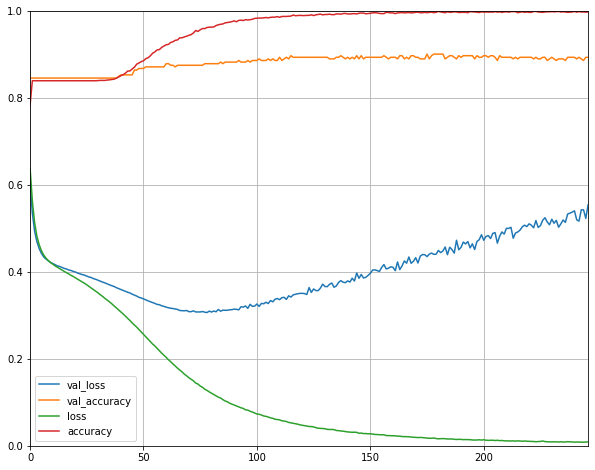

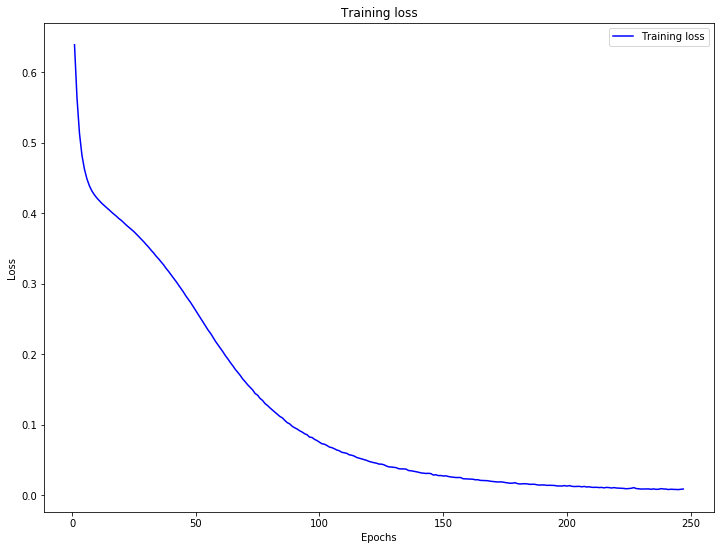

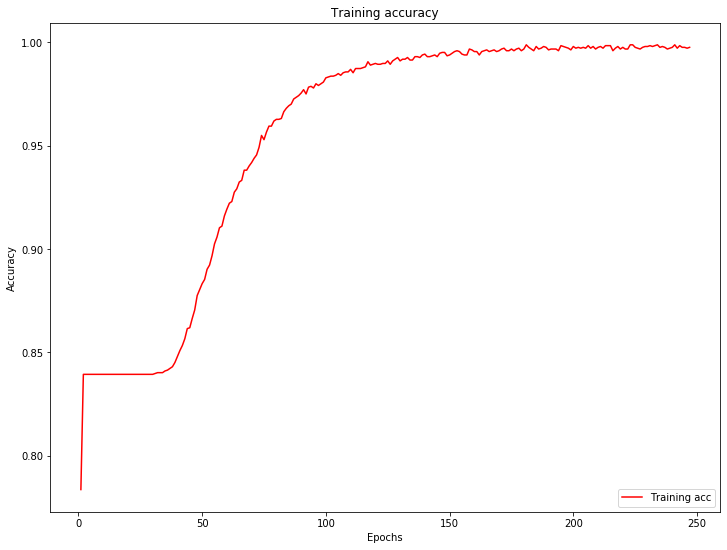

In [218]:
plot_history(training)
acc_loss_plot(modelw_dict)


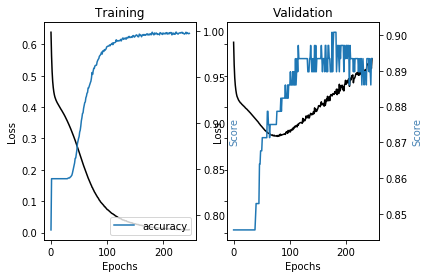

In [219]:
## encode y
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])


metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:

    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [220]:
results_train = modelw.evaluate(X_train, y_train)
print('Training:', results_train)

results_test = modelw.evaluate(X_test, y_test)
print('Test:', results_test)
    

2713/2713 [==============================] - 0s 56us/step
Training: [0.06247985756647431, 0.9874677658081055]
679/679 [==============================] - 0s 69us/step
Test: [0.5915449176515851, 0.8718703985214233]


In [221]:
# predict probabilities for test set
yhat_probs = modelw.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = modelw.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
get_metrics(y_test, yhat_classes,yhat_probs)

Accuracy: 0.871870
Precision: 0.895254
Recall: 0.959649
F1 score: 0.926334
ROC AUC: 0.816482
[[ 45  64]
 [ 23 547]]


In [214]:
vocab = list(wv_nlp_model.wv.vocab)
Xwv = wv_nlp_model [wv_nlp_model.wv.vocab]
df_wv =pd.DataFrame(Xwv)

print(len(df_wv))

df_wv.head()

1697


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.002342,0.002558,0.007348,0.000612,-0.003407,-0.008258,0.000058,0.003570,0.003911,-0.004023,...,-0.001837,0.000350,0.003684,0.010574,-0.003201,0.001328,-0.004421,0.006263,0.001502,0.005010
1,0.007697,0.002497,0.024449,0.002976,-0.014779,-0.021059,-0.008197,-0.005196,0.020643,0.002643,...,-0.004489,0.001603,-0.000921,0.027587,-0.017235,0.015534,-0.011573,0.027723,-0.008983,0.008372
2,0.002170,-0.000520,0.013484,-0.001606,-0.003382,-0.010229,-0.007959,0.000351,0.006883,0.003938,...,0.002663,-0.002093,-0.000338,0.011940,-0.012727,0.007101,-0.014007,0.013418,-0.006201,0.006517
3,-0.001246,-0.004435,0.007048,0.004531,-0.005539,-0.005566,-0.001099,-0.003966,0.002236,0.001684,...,-0.003023,0.004324,0.003754,0.004357,-0.004074,0.008979,-0.007279,0.009025,-0.001264,-0.001739
4,0.049543,-0.013382,0.100867,0.015531,-0.055056,-0.086704,-0.044799,-0.012244,0.068995,-0.001636,...,0.000413,-0.010600,0.005598,0.110296,-0.082697,0.082181,-0.076654,0.117977,-0.051763,0.020863


In [194]:
from sklearn.decomposition import IncrementalPCA    
from sklearn.manifold import TSNE                    
import plotly


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=42)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True, ):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels,)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


In [195]:
x_vals, y_vals, labels = reduce_dimensions(wv_nlp_model)
plot_with_plotly(x_vals, y_vals, labels)


# Final Model

In [196]:
# get class weights for use in model in lieu of smote
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y3_train), y3_train)
print(class_weights)

[3.12948718 0.59507557]


In [197]:
# define parameters for final model
initializer = keras.initializers.he_normal(seed=1)
regularizer = keras.regularizers.l2(0.01)
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta= 0.001, patience=7)
# create  sequential model
final_model = models.Sequential()
# activation layer 
final_model.add(layers.Dense(300, input_dim=count_terms, activation='relu', 
                       kernel_initializer=initializer, kernel_regularizer=regularizer, ))
final_model.add(layers.BatchNormalization(momentum=0.7))
# add relu activated hidden layers
final_model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizer, 
                       ))   
# output layer with sigmoid activation for binary target
final_model.add(layers.Dense(1, activation='sigmoid'))

# compile
final_model.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])

In [202]:
# Train the model 
final_predictions = final_model.fit(X3_train,
                    y3_train,
                    epochs=200,
                    callbacks=[es_callback],
                    batch_size=72,
                    class_weight={1:3.1, 0:0.60},
                    validation_data=(X3_val, y3_val),
                    shuffle=True,
                            
                    )                 

Train on 2441 samples, validate on 272 samples
Epoch 1/200
2441/2441 [==============================] - 3s 1ms/step - loss: 1.8811 - accuracy: 0.8324 - val_loss: 1.1748 - val_accuracy: 0.8676
Epoch 2/200
2441/2441 [==============================] - 2s 886us/step - loss: 0.6569 - accuracy: 0.9611 - val_loss: 0.8055 - val_accuracy: 0.8860
Epoch 3/200
2441/2441 [==============================] - 2s 886us/step - loss: 0.4223 - accuracy: 0.9738 - val_loss: 0.7060 - val_accuracy: 0.8897
Epoch 4/200
2441/2441 [==============================] - 2s 897us/step - loss: 0.3350 - accuracy: 0.9820 - val_loss: 0.6294 - val_accuracy: 0.9007
Epoch 5/200
2441/2441 [==============================] - 2s 945us/step - loss: 0.2754 - accuracy: 0.9840 - val_loss: 0.5943 - val_accuracy: 0.8971
Epoch 6/200
2441/2441 [==============================] - 2s 885us/step - loss: 0.2573 - accuracy: 0.9836 - val_loss: 0.6001 - val_accuracy: 0.8824
Epoch 7/200
2441/2441 [==============================] - 2s 939us/step - 

In [203]:
final_dict = final_predictions.history
results_train = final_model.evaluate(X3_train, y3_train)
y_hat_train = final_model.predict(X3_train) 
results_val = final_model.evaluate(X3_val, y3_val) 
results_test = final_model.evaluate(X3_test, y3_test)
yhat_probs = final_model.predict(X3_test, verbose=0)
yhat_classes = final_model.predict_classes(X3_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
print('Train results', results_train)
print('Validation results', results_val)
print('Test results', results_test)

679/679 [==============================] - 0s 323us/step
Train results [0.03647232645209184, 0.9975419640541077]
Validation results [0.4268817375687992, 0.9007353186607361]
Test results [0.5357994864720834, 0.8792341947555542]


In [204]:
get_metrics(y3_test, yhat_classes,yhat_probs)

Accuracy: 0.879234
Precision: 0.889776
Recall: 0.977193
F1 score: 0.931438
ROC AUC: 0.835216
[[ 40  69]
 [ 13 557]]


In [205]:
#save model
final_model.save("final_model.h5") 
print("model saved!!!")

model saved!!!


# Conclusion

models are all overfitting in some capacity. attempted making neural network smaller, applied bias, kernel initializers, l1 and l2 regularizers, batch normalization layers, and dropout layers to minimize loss providing slightly better results but still overfitting occurs to provide accuracy over 80%. this is due to unbalanced and small dataset. this occurs on smote balanced data as well as data ran with weights provided. More data should be obtained to improve results. further assessment planned on retweets and hashtags relativity to sentiment.

due to the fact that i got pretty similar accuracy results(80-87 percent) on the best models using various methods, i think the best way to improve this is to get additional data.